<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/Hw6/ECGR4105_Hw6_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import time

from torchvision import datasets
from torchvision import transforms

In [2]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/Machine Learning/Datasets/Housing.csv'
housing = pd.read_csv(filepath)
#define the function to remap the variables
def binary_map(x):
    return x.map({"yes": 1, "no": 0})
map_vars = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
housing[map_vars] = housing[map_vars].apply(binary_map)
#remap furnishing status
housing['furnishingstatus'] = housing['furnishingstatus'].map({'furnished':1,'semi-furnished':0,"unfurnished":-1})
housing.head()

Mounted at /content/drive


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [3]:
#split into X and Y
Y = housing.pop('price')
X = housing
X.head()
#scale data
sc_x = StandardScaler()
sc_X = sc_x.fit_transform(X)

In [4]:
#split data
x_train, x_val, y_train, y_val = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state=0)

In [5]:
#convert to numpy arrays
x_train_arr = np.c_[np.ones((len(y_train), 1)), x_train]
x_val_arr = np.c_[np.ones((len(y_val), 1)), x_val]
y_train_arr = y_train.values.reshape(-1, 1)
y_val_arr = y_val.values.reshape(-1, 1)
#convert to tensors
x_train = torch.from_numpy(x_train_arr).to(torch.float32)
y_train = torch.from_numpy(y_train_arr).to(torch.float32)
x_val = torch.from_numpy(x_val_arr).to(torch.float32)
y_val = torch.from_numpy(y_val_arr).to(torch.float32)

In [6]:
#establish network
single_layer = nn.Sequential(
    nn.Linear(13,32),
    nn.Tanh(),
    nn.Linear(32,1))
single_layer

Sequential(
  (0): Linear(in_features=13, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=1, bias=True)
)

In [7]:
#define training loop
def training(n_epochs, optimizer, model, loss_fn, x_train, x_val,
                  y_train, y_val):
    losses_train = []
    losses_val = []
    for epoch in range(1, n_epochs + 1):
        p_train = model(x_train)
        loss_train = loss_fn(p_train, y_train,)
        losses_train.append(float(loss_train))

        p_val = model(x_val)
        loss_val = loss_fn(p_val, y_val)
        losses_val.append(float(loss_val))

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch: {epoch}, Training loss: {loss_train.item():.4f},"
                  f" Validation loss: {loss_val.item():.4f}")
    return losses_train, losses_val

In [8]:
optim_single = optim.Adam(single_layer.parameters(), lr=1e-2) #optimizer for single layer training

single_losses_t, single_losses_v = training(
    n_epochs=5000, optimizer=optim_single,
    model = single_layer, loss_fn = nn.MSELoss(),
    x_train = x_train, y_train = y_train,
    x_val = x_val, y_val = y_val
)

Epoch: 1, Training loss: 26469979914240.0000, Validation loss: 25189242896384.0000
Epoch: 1000, Training loss: 26466829991936.0000, Validation loss: 25186126528512.0000
Epoch: 2000, Training loss: 26463675875328.0000, Validation loss: 25183012257792.0000
Epoch: 3000, Training loss: 26460519661568.0000, Validation loss: 25179893792768.0000
Epoch: 4000, Training loss: 26457367642112.0000, Validation loss: 25176775327744.0000
Epoch: 5000, Training loss: 26454219816960.0000, Validation loss: 25173665251328.0000


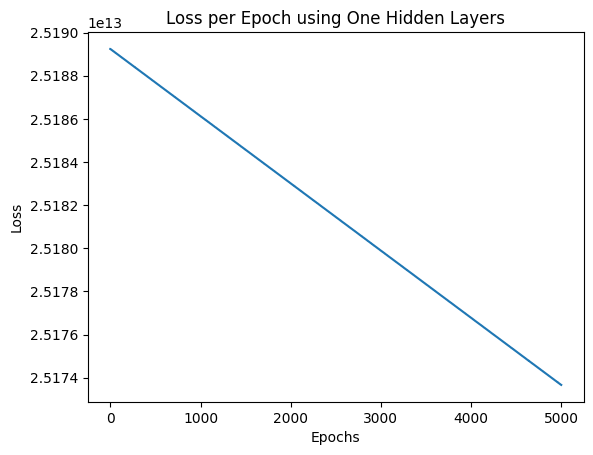

In [10]:
#plot
plt.figure(1)
plt.plot(range(5000), single_losses_v)
plt.title("Loss per Epoch using One Hidden Layers")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [11]:
#1b, do the same thing with more layers
three_layer = nn.Sequential(
    nn.Linear(13,32),
    nn.Tanh(),
    nn.Linear(32,64),
    nn.Tanh(),
    nn.Linear(64,16),
    nn.Tanh(),
    nn.Linear(16,1)
)

In [14]:
optim_multi = optim.Adam(three_layer.parameters(), lr=1e-2)

multi_losses_t, multi_losses_v = training(
    n_epochs=5000, optimizer=optim_multi,
    model = three_layer, loss_fn = nn.MSELoss(),
    x_train = x_train, y_train = y_train,
    x_val = x_val, y_val = y_val
)

Epoch: 1, Training loss: 26461830381568.0000, Validation loss: 25181185638400.0000
Epoch: 1000, Training loss: 26460207185920.0000, Validation loss: 25179585511424.0000
Epoch: 2000, Training loss: 26458583990272.0000, Validation loss: 25177979092992.0000
Epoch: 3000, Training loss: 26456964988928.0000, Validation loss: 25176374771712.0000
Epoch: 4000, Training loss: 26455339696128.0000, Validation loss: 25174768353280.0000
Epoch: 5000, Training loss: 26453710209024.0000, Validation loss: 25173161934848.0000


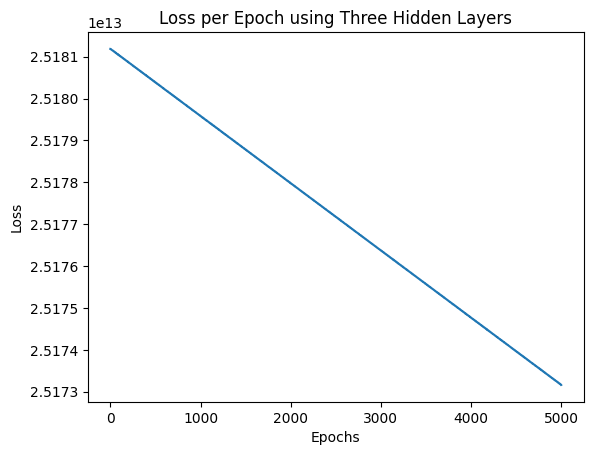

In [15]:
#plot
plt.figure(1)
plt.plot(range(5000), multi_losses_v)
plt.title("Loss per Epoch using Three Hidden Layers")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()